In [1]:
%load_ext tensorboard.notebook

In [2]:
import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import os.path


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(tf.__version__)

2.0.0-alpha0


In [4]:
# google collab version
#CSV_FILE_NAME = "usgs_gsvb_v2.csv"
# jupyter notebook version
CSV_FILE_NAME = "../csv/usgs_gsvb_v2.csv"
os.environ['CSV_FILE_NAME'] = CSV_FILE_NAME

In [5]:
# The current directory will be where this src file is located.
# Which is in the src dir of the project
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /home/davis/progs/tf-hackathon/src


In [6]:
root_path = os.path.dirname(dirpath)
print("parent directory is : " + root_path)

parent directory is : /home/davis/progs/tf-hackathon


In [7]:
logs_path = os.path.join(root_path,"logs")
print("logs directory is : " + logs_path)

logs directory is : /home/davis/progs/tf-hackathon/logs


In [8]:
LOG_DIR_NAME = logs_path
os.environ['LOG_DIR_NAME'] = LOG_DIR_NAME

In [9]:
%%bash
echo ${LOG_DIR_NAME}

/home/davis/progs/tf-hackathon/logs


In [10]:
%%bash
head ${CSV_FILE_NAME}

usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long
GSVB,33670001,2019-03-08,-6.7913385826771648,-6.7257217847769031,,36.735303,-76.011602
GSVB,33670001,2019-03-19,-6.8569553805774275,-6.758530183727034,,36.735303,-76.011602
GSVB,33670001,2019-02-21,1.9356955380577427,2.1325459317585302,,36.735303,-76.011602
GSVB,33670001,2019-03-11,-6.66010498687664,-6.4304461942257216,,36.735303,-76.011602
GSVB,33670001,2019-04-04,1.9028871391076114,2.0669291338582676,,36.735303,-76.011602
GSVB,33670001,2019-02-14,1.7716535433070866,1.9356955380577427,,36.735303,-76.011602
GSVB,33670001,2019-04-14,2.2309711286089238,2.39501312335958,,36.735303,-76.011602
GSVB,33670001,2019-02-24,2.65748031496063,2.9527559055118111,,36.735303,-76.011602
GSVB,33670001,2019-01-12,2.2965879265091864,2.39501312335958,,36.735303,-76.011602


In [11]:
%%bash
# this csv file has 9875 lines corresponding to records (plus one header row)
wc -l ${CSV_FILE_NAME}

9876 ../csv/usgs_gsvb_v2.csv


# Use generic python to read data into pandas dataframe

In [12]:
# try again, but this time lets omit any samples which have missing values
raw_dataset = pd.read_csv(CSV_FILE_NAME, 
                          header=0,
                          parse_dates=[2],
                          sep=",")

dataset = raw_dataset.copy()

## In order to add default values for missing data, use the converters helper functions

In [13]:
# Create a function to look for nans in the dataframe
# call via nans(dataset)
nans = lambda df: df[df.isnull().any(axis=1)]

In [14]:
# This should show an empty set
nans(dataset)

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long
0,GSVB,33670001,2019-03-08,-6.791339,-6.725722,NaN,36.735303,-76.011602
1,GSVB,33670001,2019-03-19,-6.856955,-6.758530,NaN,36.735303,-76.011602
2,GSVB,33670001,2019-02-21,1.935696,2.132546,NaN,36.735303,-76.011602
3,GSVB,33670001,2019-03-11,-6.660105,-6.430446,NaN,36.735303,-76.011602
4,GSVB,33670001,2019-04-04,1.902887,2.066929,NaN,36.735303,-76.011602
5,GSVB,33670001,2019-02-14,1.771654,1.935696,NaN,36.735303,-76.011602
6,GSVB,33670001,2019-04-14,2.230971,2.395013,NaN,36.735303,-76.011602
7,GSVB,33670001,2019-02-24,2.657480,2.952756,NaN,36.735303,-76.011602
8,GSVB,33670001,2019-01-12,2.296588,2.395013,NaN,36.735303,-76.011602
9,GSVB,33670001,2019-02-07,2.034121,2.198163,NaN,36.735303,-76.011602


In [15]:
dataset.dropna(inplace=True)
nans(dataset)

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long


In [16]:
dataset.shape
#dataset.head()

(5972, 8)

# Removing the NA's, removes all of the gsvb sensor readings

In [17]:
dataset[dataset.usgs == 'GSVB']

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long


In [18]:
# drop any columns which we will not use
dataset.drop(['usgs','tidal_low','site_no'], axis=1, inplace=True)
dataset.head()

,date,tidal_high,precipitation_inches,lat,long
851,2017-05-12,2.78,0.95,36.841139,-76.057139
852,2017-07-14,1.07,0.23,36.841139,-76.057139
853,2017-06-20,1.28,0.23,36.841139,-76.057139
854,2018-03-11,0.66,0.11,36.841139,-76.057139
855,2018-04-24,1.28,0.48,36.841139,-76.057139


# Create new columns for year, month, day from the date column

In [19]:
def create_ymd_cols(df, column):
    df[column + "_year"] = df[column].apply(lambda x: x.year)
    df[column + "_month"] = df[column].apply(lambda x: x.month)
    df[column + "_day"] = df[column].apply(lambda x: x.day)
    
create_ymd_cols(dataset, 'date')

In [20]:
dataset.head()

,date,tidal_high,precipitation_inches,lat,long,date_year,date_month,date_day
851,2017-05-12,2.78,0.95,36.841139,-76.057139,2017,5,12
852,2017-07-14,1.07,0.23,36.841139,-76.057139,2017,7,14
853,2017-06-20,1.28,0.23,36.841139,-76.057139,2017,6,20
854,2018-03-11,0.66,0.11,36.841139,-76.057139,2018,3,11
855,2018-04-24,1.28,0.48,36.841139,-76.057139,2018,4,24


In [21]:
# remove the date column
dataset.pop('date')
dataset.head()

,tidal_high,precipitation_inches,lat,long,date_year,date_month,date_day
851,2.78,0.95,36.841139,-76.057139,2017,5,12
852,1.07,0.23,36.841139,-76.057139,2017,7,14
853,1.28,0.23,36.841139,-76.057139,2017,6,20
854,0.66,0.11,36.841139,-76.057139,2018,3,11
855,1.28,0.48,36.841139,-76.057139,2018,4,24


In [22]:
train_ds = dataset.sample(frac=0.7,random_state=3367)
leftover_ds = dataset.drop(train_ds.index)
test_ds = leftover_ds.sample(frac=0.5, random_state=3367)
valid_ds = leftover_ds.drop(test_ds.index)

In [23]:
# Create seperate series/dataframe? for labels
# Remove the label from the dataframes.
train_labels = train_ds.pop('tidal_high')
test_labels = test_ds.pop('tidal_high')
valid_labels = valid_ds.pop('tidal_high')

# Normalize the data

In [24]:
# use only the training data to get mean and std 
# which we can use to norm all datasets
train_stats_df = train_ds.copy()
train_stats = train_stats_df.describe().transpose()


In [25]:
def norm(a_df):
    # Do the norm operation
    normed_df = (a_df - train_stats['mean']) / train_stats['std']
    return normed_df

normed_train_ds = norm(train_ds)
normed_test_ds = norm(test_ds)
normed_valid_ds = norm(valid_ds)

In [26]:
#normed_train_ds
normed_valid_ds

,precipitation_inches,lat,long,date_year,date_month,date_day
2080,-1.455955,-2.495987,0.945704,-0.321738,-1.595246,-0.211495
9475,-0.205969,0.121609,0.928613,-1.410696,1.235030,1.480355
6526,-0.244430,0.744536,0.939247,-0.321738,0.385947,-1.677765
1245,0.063258,0.744536,0.939247,-0.321738,-1.029191,-1.677765
6162,-0.244430,0.417023,-0.054341,-1.410696,0.385947,-0.549865
8209,-0.244430,0.165746,-1.536747,-1.410696,1.518057,-1.452185
1219,0.120950,0.744536,0.939247,0.767221,1.235030,-1.113815
6953,-0.244430,0.744536,0.939247,0.767221,0.102919,-0.662655
8181,-0.244430,0.165746,-1.536747,-0.321738,-0.746164,-0.211495
6545,-0.244430,0.744536,0.939247,-0.321738,-1.029191,-0.662655


# Build the model again

In [76]:
# train_ds determines the input feature size
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_ds.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
    ])

# orig
#optimizer = tf.keras.optimizers.RMSprop(0.001)
# increase learning rate if fairly consistent but slow changing
optimizer = tf.keras.optimizers.RMSprop(0.01)
# 0.1 is too big
#optimizer = tf.keras.optimizers.RMSprop(0.1)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])


# Train the model again  (tensorboard version)

In [77]:
EPOCHS = 1000

In [90]:
%%bash
# clear any logs from previous runs
rm -rf ${LOG_DIR_NAME}

In [79]:
logdir = os.path.join(LOG_DIR_NAME, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
print(logdir)

/home/davis/progs/tf-hackathon/logs/20190506-171656


In [80]:
os.environ['LOG_DIR_NAME_TIME_VARIABLE'] = logdir

In [81]:
# cell magic is weird on how to evaluate this
# this works since its hard coded but not time variable
#%tensorboard --logdir '/home/davis/progs/tf-hackathon/logs'
# ps auxw | grep tensorboard show this as literal --logdir logdir
#%tensorboard --logdir logdir
# ps auxw | grep tensorboard show this as literal --logdir $/home/davis/....
#%tensorboard --logdir ${LOG_DIR_NAME}
# ps auxw | grep tensorboard show this as literal --logdir /home/davis/...
# this works because it finds tf events in root down
#%tensorboard --logdir {LOG_DIR_NAME}
# this does not work.  ps auxw shows tensorboard --logdir {LOG_DIR_NAME_TIME_VARIABLE}
#%tensorboard --logdir {LOG_DIR_NAME_TIME_VARIABLE}
# this works best. it shows up in tensorboard with time variable. tensorboard --logdir /home/davis/progs/tf-hackathon/logs/20190506-115136
%tensorboard --logdir {logdir}

Wait a bit until the above pane shows the blank tensorboard page before running the cell below

In [82]:
# verbose:
# 0 no output
# 1 shows a progress bar and results for each epoch
# 2 shows results for each epoch
#                     batch_size=16,

history = model.fit(normed_train_ds, 
                    train_labels,
                    epochs=EPOCHS,
                    validation_data = (normed_valid_ds, valid_labels), 
                    verbose=0,
                    callbacks=[tensorboard_callback])

# Train the model again (history plots) version

This version does not use a log dir?  No need to erase it?

In [94]:
%%bash
# clear any logs from previous runs
pwd
rm -rf ${LOG_DIR_NAME}

/home/davis/progs/tf-hackathon/src


In [95]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [96]:
#                    batch_size=16,

history = model.fit(normed_train_ds, 
                    train_labels,
                    epochs=EPOCHS,
                    validation_data = (normed_valid_ds, valid_labels),
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

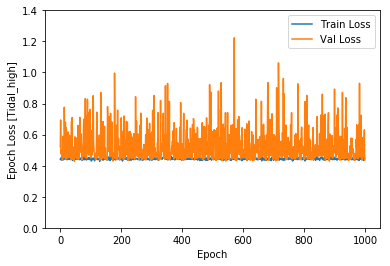

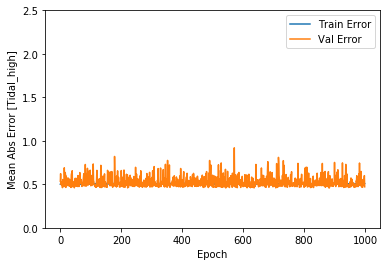

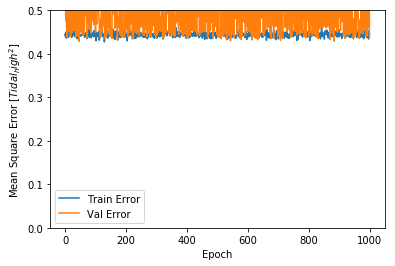

In [97]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Epoch Loss [Tidal_high]')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.ylim([0,1.4])
    plt.legend()


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Tidal_high]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.ylim([0,2.5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Tidal_high^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],label = 'Val Error')
    plt.ylim([0,0.5])
    plt.legend()
    plt.show()


plot_history(history)

In [98]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [99]:
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,0.442182,0.501500,0.442182,0.521380,0.534621,0.521380,0
1,0.446740,0.507020,0.446740,0.694125,0.622270,0.694125,1
2,0.437705,0.499491,0.437705,0.484848,0.501278,0.484848,2
3,0.449624,0.507479,0.449624,0.475264,0.497760,0.475264,3
4,0.450934,0.507488,0.450934,0.502878,0.525401,0.502878,4
5,0.436193,0.501665,0.436193,0.461208,0.488188,0.461208,5
6,0.446235,0.505182,0.446235,0.489520,0.512125,0.489520,6
7,0.450686,0.510275,0.450686,0.438201,0.461655,0.438201,7
8,0.439014,0.500458,0.439014,0.589252,0.555235,0.589252,8
9,0.439149,0.502009,0.439150,0.532331,0.536665,0.532331,9


Using the validation dataset as the validation data shows a slight improvement.  Adjusting the learning rate does likewise.